# **IDL Assignment 4 - DenseNets**

## **Assigning Tensorflow version and importing the libraries required for the tasks**


In [4]:
# %tensorflow_version 2.x

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
import os

In [5]:
tf.__version__

'2.2.0'

## **Load CIFAR10 dataset**

In [6]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()


170500096/170498071 [==============================] - 546s 3us/step


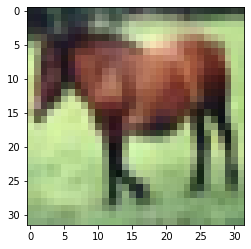

In [7]:
plt.imshow(train_images[7], cmap=plt.cm.binary)


In [8]:

# this is now different
train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

test_data = tf.data.Dataset.from_tensor_slices((test_images, test_labels))


# things we really gotta do:
# - normalize the images to [0, 1] (first convert to float)
# - reshape images from (28, 28) to (784,) (although we could do this later!)
# - convert labels to int32 (otherwise tensorflow is gonna be sad :( )

#train_images = (train_images.astype(np.float32) / 255.).reshape((-1, 784))
#test_images = (test_images.astype(np.float32) / 255.).reshape((-1, 784))
train_images = (train_images.astype(np.float32) / 255.)
test_images = (test_images.astype(np.float32) / 255.)

train_labels = train_labels.astype(np.int32).reshape((-1,))
test_labels = test_labels.astype(np.int32).reshape((-1,))

train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

test_data = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

    


In [9]:
train_data

<TensorSliceDataset shapes: ((32, 32, 3), ()), types: (tf.float32, tf.int32)>

In [10]:
## Declare the sizes of batch, shuffle and repeat

SHUFFLE_SIZE = 10000
BATCH_SIZE = 128
REPEAT_TIMES = 3

In [11]:
def batch_shuffle_repeat(data):


    data = data.shuffle(SHUFFLE_SIZE, reshuffle_each_iteration= True)
    data = data.batch(BATCH_SIZE)    
    #data = data.repeat(REPEAT_TIMES)


    return data

In [12]:
train_data = batch_shuffle_repeat(train_data)


In [13]:
test_data = test_data.shuffle(SHUFFLE_SIZE).batch(BATCH_SIZE)

In [14]:
train_labels.shape

(50000,)

## Training of the CNN Network

**Observations**

**Indicators**
C - Convolution layer |
D - Dropout layer |
P - MaxPool layer |
F - Flatten

1. C(32,3);D(0.2);Dense(5 layers,32 channels each, 3filter size);C(32,3);P(2);D(0.3);Dense(5 layers,32 channels each, 3filter size);C(32,3);P(2);D(0.4);Dense(5 layers,32 channels each, 3filter size);P(2);F 

      **epochs - 5**
      **Test Accuracy -- 70.74**

2. C(32,2);D(0.2);Dense(5 layers,32 channels each, 2filter size);C(64,2);P(2);D(0.3);Dense(5 layers,32 channels each, 2filter size);C(128,3);P(2);D(0.4);Dense(5 layers,32 channels each, 3filter size);P(2);F 

      **epochs - 10**
      **Test Accuracy -- 77.50**

3. C(32,2);D(0.2);Dense(5 layers,32 channels each, 2filter size);C(64,2);P(2);D(0.3);Dense(5 layers,64 channels each, 2filter size);C(128,3);P(2);D(0.4);Dense(5 layers,128 channels each, 3filter size);P(2);F 

      **epochs - 50**
      **Test Accuracy -- 73.42**


4. C(32,2);D(0.2);Dense(5 layers,32 channels each, 2filter size);C(64,2);P(2);D(0.3);Dense(5 layers,64 channels each, 2filter size);C(128,3);P(2);D(0.4);Dense(5 layers,128 channels each, 3filter size);P(2);F 

      **epochs - 10**
      **Test Accuracy -- 75.27**

    **3 and 4 have same parameter config**

5. C(32,2);D(0.01);Dense(5 layers,32 channels each, 2filter size);C(32,2);P(2);D(0.2);Dense(5 layers,32 channels each, 2filter size);C(32,2);P(2);D(0.3);Dense(5 layers,32 channels each, 2filter size);P(2);F 

      **epochs - 10**
      **Test Accuracy -- 71.72**

6. C(32,2);D(0.01);Dense(5 layers,32 channels each, 2filter size);C(64,2);P(2);D(0.2);Dense(5 layers,32 channels each, 2filter size);C(64,2);P(2);D(0.3);Dense(5 layers,32 channels each, 2filter size);P(2);F 

      **epochs - 10**
      **Test Accuracy -- 74.79**

7. C(32,2);D(0.01);Dense(5 layers,32 channels each, 2filter size);C(64,2,stride=2);;D(0.2);Dense(5 layers,32 channels each, 2filter size);C(64,2,stride=2);D(0.3);Dense(5 layers,32 channels each, 2filter size);P(2);F 

      **epochs - 10**
      **Test Accuracy -- 73.56**

8. C(32,2);D(0.2);Dense(5 layers,32 channels each, 2filter size);C(64,2,stride=2);;D(0.3);Dense(5 layers,32 channels each, 2filter size);C(128,2, stride=2);D(0.4);Dense(5 layers,32 channels each, 2filter size);P(2);F 

      **epochs - 10**
      **Test Accuracy -- 71.64**

9. C(32,2);D(0.2);Dense(5 layers,32 channels each, 2filter size);C(64,2,stride=2);;D(0.3);Dense(5 layers,32 channels each, 2filter size);C(128,3, stride=2);D(0.4);Dense(5 layers,32 channels each, 3filter size);F 

      **epochs - 10**
      **Test Accuracy -- 73.62**

### Using Model.Fit

In [15]:
## Dense network

img = tf.keras.Input(shape = (32,32,3))

## Conv and dropout
layerConv_1 = tf.keras.layers.Conv2D(32,2,padding='same',activation='relu',
                        input_shape=(32,32,3),
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(img)

dropout_1 = tf.keras.layers.Dropout(0.2)(layerConv_1)


## Dense layer 1
layerDense_1_1 = tf.keras.layers.Conv2D(32,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(dropout_1)
layerDense_1_2 = tf.keras.layers.Conv2D(32,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(tf.keras.layers.concatenate((dropout_1, layerDense_1_1), axis = 3))
layerDense_1_3 = tf.keras.layers.Conv2D(32,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(tf.keras.layers.concatenate((dropout_1, layerDense_1_1, layerDense_1_2), axis = 3))
layerDense_1_4 = tf.keras.layers.Conv2D(32,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(tf.keras.layers.concatenate((dropout_1, layerDense_1_1, layerDense_1_2, layerDense_1_3), axis = 3))
layerDense_1_5 = tf.keras.layers.Conv2D(32,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(tf.keras.layers.concatenate((dropout_1, layerDense_1_1, layerDense_1_2, layerDense_1_3, layerDense_1_4), axis = 3))


## Conv pool and dropout layer 2
layerConv_2 = tf.keras.layers.Conv2D(64,2,strides = 2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(layerDense_1_5)
#maxpool_2 = tf.keras.layers.MaxPool2D((2,2))(layerConv_2)
dropout_2 = tf.keras.layers.Dropout(0.3)(layerConv_2)



## Dense layer 2
layerDense_2_1 = tf.keras.layers.Conv2D(32,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(dropout_2)
layerDense_2_2 = tf.keras.layers.Conv2D(32,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(tf.keras.layers.concatenate((dropout_2, layerDense_2_1), axis = 3))
layerDense_2_3 = tf.keras.layers.Conv2D(32,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(tf.keras.layers.concatenate((dropout_2, layerDense_2_1, layerDense_2_2), axis = 3))
layerDense_2_4 = tf.keras.layers.Conv2D(32,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(tf.keras.layers.concatenate((dropout_2, layerDense_2_1, layerDense_2_2, layerDense_2_3), axis = 3))
layerDense_2_5 = tf.keras.layers.Conv2D(32,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(tf.keras.layers.concatenate((dropout_2, layerDense_2_1, layerDense_2_2, layerDense_2_3, layerDense_2_4), axis = 3))


## Conv pool and dropout layer 3
layerConv_3 = tf.keras.layers.Conv2D(128,3,strides = 2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(layerDense_2_5)
#maxpool_3 = tf.keras.layers.MaxPool2D((2,2))(layerConv_3)
dropout_3 = tf.keras.layers.Dropout(0.4)(layerConv_3)

## Dense layer 3
layerDense_3_1 = tf.keras.layers.Conv2D(32,3,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(dropout_3)
layerDense_3_2 = tf.keras.layers.Conv2D(32,3,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(tf.keras.layers.concatenate((dropout_3, layerDense_3_1), axis = 3))
layerDense_3_3 = tf.keras.layers.Conv2D(32,3,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(tf.keras.layers.concatenate((dropout_3, layerDense_3_1, layerDense_3_2), axis = 3))
layerDense_3_4 = tf.keras.layers.Conv2D(32,3,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(tf.keras.layers.concatenate((dropout_3, layerDense_3_1, layerDense_3_2, layerDense_3_3), axis = 3))
layerDense_3_5 = tf.keras.layers.Conv2D(32,3,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(tf.keras.layers.concatenate((dropout_3, layerDense_3_1, layerDense_3_2, layerDense_3_3, layerDense_3_4), axis = 3))


## Pooling and flattening
#maxpool_4 = tf.keras.layers.MaxPool2D((2,2))(layerDense_3_5)
layerFlatten = tf.keras.layers.Flatten()(layerDense_3_5)

layerOutput = tf.keras.layers.Dense(10,kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                                    use_bias= True,bias_initializer='zeros' )(layerFlatten)


opt = tf.optimizers.Adam()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

## Train accuracy metric
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

In [16]:
## Define the model
model_cifar10 = tf.keras.Model(img, layerOutput, name = 'Cifar10')


In [17]:
## Get the summary of the model
model_cifar10.summary()

Model: "Cifar10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 32)   416         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 32, 32, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   4128        dropout[0][0]                    
____________________________________________________________________________________________

In [18]:
model_cifar10.compile(optimizer= opt,
              loss = loss_fn,
              metrics = [train_acc_metric])

In [19]:
history = model_cifar10.fit(train_data,epochs=10)

Epoch 1/10
391/391 [==============================] - 39s 101ms/step - loss: 1.7440 - sparse_categorical_accuracy: 0.3646
Epoch 2/10
391/391 [==============================] - 39s 101ms/step - loss: 1.3830 - sparse_categorical_accuracy: 0.5003
Epoch 3/10
391/391 [==============================] - 40s 102ms/step - loss: 1.1675 - sparse_categorical_accuracy: 0.5813
Epoch 4/10
391/391 [==============================] - 39s 100ms/step - loss: 1.0199 - sparse_categorical_accuracy: 0.63700s - loss: 1.0199 - sparse_categorical_accuracy: 0
Epoch 5/10
391/391 [==============================] - 40s 101ms/step - loss: 0.9212 - sparse_categorical_accuracy: 0.6741
Epoch 6/10
391/391 [==============================] - 41s 104ms/step - loss: 0.8396 - sparse_categorical_accuracy: 0.7037
Epoch 7/10
391/391 [==============================] - 38s 98ms/step - loss: 0.7807 - sparse_categorical_accuracy: 0.7234
Epoch 8/10
391/391 [==============================] - 39s 98ms/step - loss: 0.7226 - sparse_categ

In [20]:
if tf.test.gpu_device_name(): 

    print('Default GPU Device:

    {}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

SyntaxError: EOL while scanning string literal (<ipython-input-20-2b56edfc58af>, line 3)

In [ ]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model_cifar10(img_batch))
print("Test acc: {}".format(test_acc_metric.result()))

In [ ]:
test_loss, test_acc = model_cifar10.evaluate(test_data)
print("Loss: {} Accuracy: {}".format(test_loss, test_acc))


### Tensorboard computation graphs

![alt text](https://drive.google.com/uc?id=1-5GbqETI9ZQ-K1lSURmpU1NELhPTaP8U)

In [ ]:
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
model_cifar10.fit(train_data,epochs=10,callbacks =[tensorboard_callback])

In [ ]:
test_acc_metric = tf.metrics.SparseCategoricalAccuracy()
for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model_cifar10_fn(img_batch))

print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.767300009727478


### Using tf.Function

**Observations**

C(32,2);D(0.2);Dense(5 layers,32 channels each, 2filter size);C(64,2,Stride-2);D(0.3);Dense(5 layers,32 channels each, 2filter size);C(128,3,stride-2);D(0.4);Dense(5 layers,32 channels each, 3filter size);F 
1. Epoch 10 = 73.3%
2. Epoch 20 = 74.83%
3. Epoch 50 = 75.45%

C(32,2);D(0.2);Dense(5 layers,32 channels each, 2filter size);C(64,2,Stride-2);D(0.3);Dense(5 layers,32 channels each, 2filter size);C(64,2,stride-2);D(0.4);Dense(5 layers,32 channels each, 2filter size);F 

1. Epoch 10 = 70.60%
2. Epoch 20 = 76.64%
3. Epoch 50 = 77.67%

C(32,2);D(0.2);Dense(5 layers,32 channels each, 2filter size);C(64,2,Stride-2);D(0.3);Dense(5 layers,64 channels each, 2filter size);C(64,2,stride-2);D(0.4);Dense(5 layers,64 channels each, 2filter size);F

1. Epoch 10 = 73.75%
2. Epoch 20 = 75.77%
3. Epoch 30 = 76.73%

In [ ]:
## Dense network

img = tf.keras.Input(shape = (32,32,3))



## Conv and dropout
layerConv_1 = tf.keras.layers.Conv2D(32,2,padding='same',activation='relu',
                        input_shape=(32,32,3),
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(img)

dropout_1 = tf.keras.layers.Dropout(0.2)(layerConv_1)


## Dense layer 1
layerDense_1_1 = tf.keras.layers.Conv2D(32,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(dropout_1)
layerDense_1_2 = tf.keras.layers.Conv2D(32,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(tf.keras.layers.concatenate((dropout_1, layerDense_1_1), axis = 3))
layerDense_1_3 = tf.keras.layers.Conv2D(32,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(tf.keras.layers.concatenate((dropout_1, layerDense_1_1, layerDense_1_2), axis = 3))
layerDense_1_4 = tf.keras.layers.Conv2D(32,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(tf.keras.layers.concatenate((dropout_1, layerDense_1_1, layerDense_1_2, layerDense_1_3), axis = 3))
layerDense_1_5 = tf.keras.layers.Conv2D(32,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(tf.keras.layers.concatenate((dropout_1, layerDense_1_1, layerDense_1_2, layerDense_1_3, layerDense_1_4), axis = 3))


## Conv pool and dropout layer 2
layerConv_2 = tf.keras.layers.Conv2D(64,2,strides = 2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(layerDense_1_5)
#maxpool_2 = tf.keras.layers.MaxPool2D((2,2))(layerConv_2)
dropout_2 = tf.keras.layers.Dropout(0.3)(layerConv_2)



## Dense layer 2
layerDense_2_1 = tf.keras.layers.Conv2D(64,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(dropout_2)
layerDense_2_2 = tf.keras.layers.Conv2D(64,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(tf.keras.layers.concatenate((dropout_2, layerDense_2_1), axis = 3))
layerDense_2_3 = tf.keras.layers.Conv2D(64,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(tf.keras.layers.concatenate((dropout_2, layerDense_2_1, layerDense_2_2), axis = 3))
layerDense_2_4 = tf.keras.layers.Conv2D(64,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(tf.keras.layers.concatenate((dropout_2, layerDense_2_1, layerDense_2_2, layerDense_2_3), axis = 3))
layerDense_2_5 = tf.keras.layers.Conv2D(64,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(tf.keras.layers.concatenate((dropout_2, layerDense_2_1, layerDense_2_2, layerDense_2_3, layerDense_2_4), axis = 3))


## Conv pool and dropout layer 3
layerConv_3 = tf.keras.layers.Conv2D(64,2,strides = 2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(layerDense_2_5)
#maxpool_3 = tf.keras.layers.MaxPool2D((2,2))(layerConv_3)
dropout_3 = tf.keras.layers.Dropout(0.4)(layerConv_3)

## Dense layer 3
layerDense_3_1 = tf.keras.layers.Conv2D(64,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(dropout_3)
layerDense_3_2 = tf.keras.layers.Conv2D(64,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(tf.keras.layers.concatenate((dropout_3, layerDense_3_1), axis = 3))
layerDense_3_3 = tf.keras.layers.Conv2D(64,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(tf.keras.layers.concatenate((dropout_3, layerDense_3_1, layerDense_3_2), axis = 3))
layerDense_3_4 = tf.keras.layers.Conv2D(64,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(tf.keras.layers.concatenate((dropout_3, layerDense_3_1, layerDense_3_2, layerDense_3_3), axis = 3))
layerDense_3_5 = tf.keras.layers.Conv2D(64,2,padding='same',activation='relu',
                        kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                        use_bias = True,bias_initializer='zeros')(tf.keras.layers.concatenate((dropout_3, layerDense_3_1, layerDense_3_2, layerDense_3_3, layerDense_3_4), axis = 3))


## Pooling and flattening
#maxpool_4 = tf.keras.layers.MaxPool2D((2,2))(layerDense_3_5)
layerFlatten = tf.keras.layers.Flatten()(layerDense_3_5)

layerOutput = tf.keras.layers.Dense(10,kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                                    use_bias= True,bias_initializer='zeros' )(layerFlatten)



In [ ]:
## Define the model
model_cifar10_fn = tf.keras.Model(img, layerOutput, name = 'Cifar10')


In [ ]:
model_cifar10_fn.summary()

In [ ]:

opt = tf.optimizers.Adam()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

## Train accuracy metric
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

In [ ]:
# stereotypical train-step-with-function-annotation

@tf.function
def train_step(imgs, lbls):
    with tf.GradientTape() as tape:
        logits = model_cifar10_fn(imgs,training=True)
        loss = loss_fn(lbls, logits)

    varis = model_cifar10_fn.trainable_variables
    grads = tape.gradient(loss, varis)
    opt.apply_gradients(zip(grads, varis))

    return loss, logits


In [ ]:
import time
start = time.time()

steps = 0

epochs = 50
for epoch in range(epochs):
  print("="*90)
  print('Start of epoch %d' % (epoch,))

  for img_batch,lbl_batch in train_data:
      steps = steps+1
      loss, logits = train_step(img_batch, lbl_batch)

      if not steps % 100:
          train_acc_metric(lbl_batch, logits)
          acc = train_acc_metric.result()
          print("Loss: {} Accuracy: {}".format(loss, acc))
          train_acc_metric.reset_states()


stop = time.time()
print("took {} seconds\n".format(stop-start))
#start = time.time()


Start of epoch 0
Loss: 0.3725576400756836 Accuracy: 0.875
Loss: 0.4120078384876251 Accuracy: 0.8671875
Loss: 0.34093543887138367 Accuracy: 0.8828125
Start of epoch 1
Loss: 0.2901102304458618 Accuracy: 0.8984375
Loss: 0.32507985830307007 Accuracy: 0.875
Loss: 0.5197538137435913 Accuracy: 0.796875
Loss: 0.36152327060699463 Accuracy: 0.8515625
Start of epoch 2
Loss: 0.20199868083000183 Accuracy: 0.9296875
Loss: 0.3061571717262268 Accuracy: 0.8984375
Loss: 0.342501699924469 Accuracy: 0.8828125
Loss: 0.44678550958633423 Accuracy: 0.859375
Start of epoch 3
Loss: 0.26982182264328003 Accuracy: 0.90625
Loss: 0.38213470578193665 Accuracy: 0.84375
Loss: 0.22671423852443695 Accuracy: 0.9453125
Loss: 0.37183207273483276 Accuracy: 0.875
Start of epoch 4
Loss: 0.36144572496414185 Accuracy: 0.8671875
Loss: 0.2409334033727646 Accuracy: 0.9140625
Loss: 0.2540138363838196 Accuracy: 0.890625
Loss: 0.2537589967250824 Accuracy: 0.9140625
Start of epoch 5
Loss: 0.32251089811325073 Accuracy: 0.8984375
Loss: 0